# Introduction to Pandas
Pandas is a powerful library for data manipulation and analysis. It is built on top of NumPy and provides data structures and functions needed to work on structured data seamlessly.

In [6]:
# Importing Pandas
import pandas as pd
print(pd.__version__)

2.0.3


# Data Structures: Series and DataFrame
Pandas has two primary data structures:
- **Series**: A one-dimensional labeled array capable of holding any data type.
- **DataFrame**: A two-dimensional labeled data structure with columns of potentially different types.

In [7]:
# Creating a Series
s = pd.Series([1, 2, 3, 4, 5])
print(s)
print(s.index, s.values, s.dtype)

0    1
1    2
2    3
3    4
4    5
dtype: int64
RangeIndex(start=0, stop=5, step=1) [1 2 3 4 5] int64


In [24]:
# Creating a DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie'], 'Age': [25, 30, 35]}
df = pd.DataFrame(data)
print(df)
print(df.index, df.columns, df.values, df.shape, df.dtypes)

      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   35
RangeIndex(start=0, stop=3, step=1) Index(['Name', 'Age'], dtype='object') [['Alice' 25]
 ['Bob' 30]
 ['Charlie' 35]] (3, 2) Name    object
Age      int64
dtype: object


In [10]:
print(df.index, df.columns, df.values, df.shape, df.dtypes)

RangeIndex(start=0, stop=3, step=1) Index(['Name', 'Age'], dtype='object') [['Alice' 25]
 ['Bob' 30]
 ['Charlie' 35]] (3, 2) Name    object
Age      int64
dtype: object


# Data Indexing and Selection
Pandas provides powerful indexing and selection capabilities. You can select data by label or position, and use boolean indexing to filter data.

In [11]:
df

,Name,Age
0,Alice,25
1,Bob,30
2,Charlie,35


In [12]:
# Indexing and Slicing
print(df.loc[0])  # By label
print(df.iloc[0])  # By position
print(df.loc[:, 'Name'])  # All rows, single column
print(df.iloc[:, 0])  # All rows, single column by position
print(df.loc[0, 'Name'])  # Single value by label
print(df.iloc[0, 0])  # Single value by position

Name    Alice
Age        25
Name: 0, dtype: object
Name    Alice
Age        25
Name: 0, dtype: object
0      Alice
1        Bob
2    Charlie
Name: Name, dtype: object
0      Alice
1        Bob
2    Charlie
Name: Name, dtype: object
Alice
Alice


In [13]:
# Boolean Indexing
print(df[df['Age'] > 30])

      Name  Age
2  Charlie   35


In [14]:
# Setting and Resetting Index
df.set_index('Name', inplace=True)
print(df)
df.reset_index(inplace=True)
print(df)

         Age
Name        
Alice     25
Bob       30
Charlie   35
      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   35


# Data Manipulation
Pandas makes it easy to manipulate data. You can add or modify columns, and drop unnecessary columns or rows.

In [22]:
# Adding and Modifying Columns
df['Salary'] = [50000, 60000, 70000]
print(df)
df['Age'] += 1
print(df)

ValueError: Length of values (3) does not match length of index (2)

In [16]:
# Dropping Columns and Rows
df.drop('Salary', axis=1, inplace=True)
print(df)
df.drop(0, axis=0, inplace=True)
print(df)

      Name  Age
0    Alice   26
1      Bob   31
2  Charlie   36
      Name  Age
1      Bob   31
2  Charlie   36


In [51]:
# Renaming Columns and Index
df.rename(columns={'Age': 'Years'}, inplace=True)
print(df)

      Name  Years  Salary  Years
0    Alice     25   50000    NaN
1      Bob     30   60000    NaN
2  Charlie     35   70000    NaN


# Handling Missing Data
Handling missing data is crucial in data analysis. Pandas provides functions to detect, fill, and drop missing data.

In [19]:
df

,Name,Years
1,Bob,31.0
2,Charlie,NaN


In [50]:
# Detecting Missing Data
df.loc[2, 'Years'] = None
print(df.isnull())
print(df.notnull())

    Name    Age  Salary  Years
0  False  False   False   True
1  False  False   False   True
2  False  False   False   True
   Name   Age  Salary  Years
0  True  True    True  False
1  True  True    True  False
2  True  True    True  False


In [11]:
# Filling Missing Data
df.fillna(0, inplace=True)
print(df)

In [12]:
# Dropping Missing Data
df.dropna(inplace=True)
print(df)

# Data Aggregation and Grouping
Pandas provides powerful aggregation functions to summarize data. Grouping and pivot tables are key features for data analysis.

In [25]:
df

,Name,Age
0,Alice,25
1,Bob,30
2,Charlie,35


In [26]:
# Grouping Data
grouped = df.groupby('Name')
print(grouped.mean())

          Age
Name         
Alice    25.0
Bob      30.0
Charlie  35.0


In [27]:
# Aggregation Functions
print(grouped.agg(['sum', 'mean']))

        Age      
        sum  mean
Name             
Alice    25  25.0
Bob      30  30.0
Charlie  35  35.0


In [49]:
# Pivot Tables
df['Salary'] = [50000, 60000, 70000]
print(df.pivot_table(values='Salary', index='Years', columns='Name', aggfunc='mean'))

KeyError: 'Years'

# Merging and Joining DataFrames
Combining DataFrames is essential in data analysis. Pandas provides several functions to merge and join DataFrames.

In [52]:
# Concatenation
df1 = pd.DataFrame({'A': ['A0', 'A1'], 'B': ['B0', 'B1']})
df2 = pd.DataFrame({'A': ['A2', 'A3'], 'B': ['B2', 'B3']})
result = pd.concat([df1, df2])
print(result)

    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


In [53]:
# Merging
left = pd.DataFrame({'key': ['K0', 'K1'], 'A': ['A0', 'A1']})
right = pd.DataFrame({'key': ['K0', 'K2'], 'B': ['B0', 'B2']})
result = pd.merge(left, right, on='key', how='inner')
print(result)

  key   A   B
0  K0  A0  B0


In [54]:
# Joining
left = pd.DataFrame({'A': ['A0', 'A1']}, index=['K0', 'K1'])
right = pd.DataFrame({'B': ['B0', 'B1']}, index=['K0', 'K2'])
result = left.join(right, how='inner')
print(result)

     A   B
K0  A0  B0


# Time Series Data
Pandas has robust support for time series data, including date range generation, indexing, and resampling.

In [55]:
# Date Range Generation
date_range = pd.date_range(start='2020-01-01', end='2020-01-10', freq='D')
print(date_range)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')


In [56]:
# Indexing with Time Series
df['Date'] = pd.date_range(start='2020-01-01', periods=5, freq='D')
df.set_index('Date', inplace=True)
print(df)

ValueError: Length of values (5) does not match length of index (3)

In [21]:
# Resampling Time Series Data
df['Value'] = [1, 2, 3, 4, 5]
print(df.resample('2D').mean())

# Input and Output Operations
Pandas can read and write data to various file formats, making it easy to handle data from multiple sources.

In [22]:
# Reading Data from Various Formats
# Uncomment and replace 'file.csv', 'file.xlsx', etc. with actual file paths or data sources
# df_csv = pd.read_csv('file.csv')
# df_excel = pd.read_excel('file.xlsx')
# df_sql = pd.read_sql('SELECT * FROM table', con)
# df_json = pd.read_json('file.json')
# print(df_csv, df_excel, df_sql, df_json)

In [23]:
# Writing Data to Various Formats
# Uncomment and replace 'file.csv', 'file.xlsx', etc. with actual file paths or destinations
# df.to_csv('file.csv')
# df.to_excel('file.xlsx')
# df.to_sql('table', con)
# df.to_json('file.json')

# Visualization with Pandas
Pandas integrates with Matplotlib to provide basic plotting capabilities, making it easy to visualize data.

<Axes: >

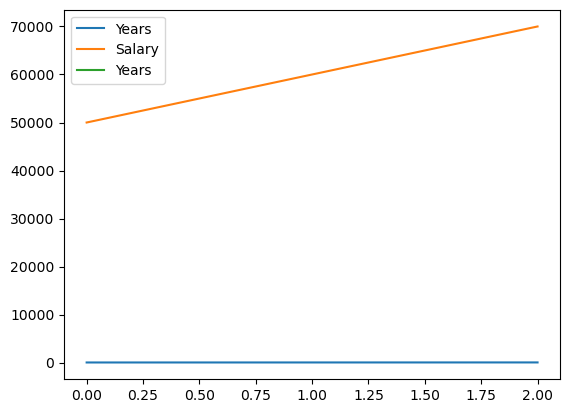

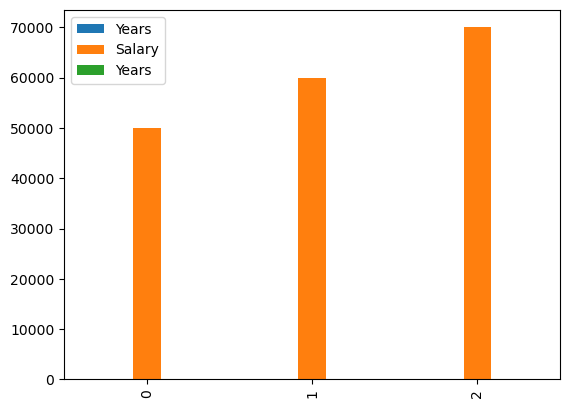

In [57]:
# Basic Plotting
df.plot(kind='line')
df.plot(kind='bar')

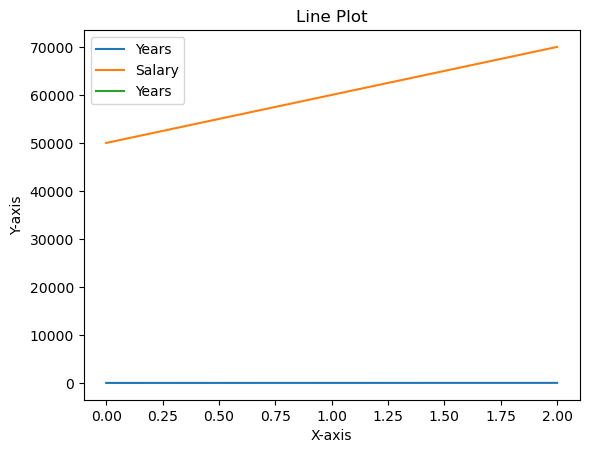

In [58]:
# Advanced Plotting with Matplotlib
import matplotlib.pyplot as plt
df.plot(kind='line')
plt.title('Line Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

# Titanic Dataset Analysis
Now, let's apply what we've learned to the Titanic dataset.

In [59]:
# Load the Titanic dataset
titanic = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')
(titanic.head())

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


### Data Indexing and Selection

In [60]:
# Selecting specific columns
print(titanic[['Name', 'Age']].head())

                                                Name   Age
0                             Mr. Owen Harris Braund  22.0
1  Mrs. John Bradley (Florence Briggs Thayer) Cum...  38.0
2                              Miss. Laina Heikkinen  26.0
3        Mrs. Jacques Heath (Lily May Peel) Futrelle  35.0
4                            Mr. William Henry Allen  35.0


In [61]:
# Filtering data
print(titanic[titanic['Age'] > 30].head())

    Survived  Pclass                                               Name  \
1          1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
3          1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4          0       3                            Mr. William Henry Allen   
6          0       1                             Mr. Timothy J McCarthy   
11         1       1                            Miss. Elizabeth Bonnell   

       Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
1   female  38.0                        1                        0  71.2833  
3   female  35.0                        1                        0  53.1000  
4     male  35.0                        0                        0   8.0500  
6     male  54.0                        0                        0  51.8625  
11  female  58.0                        0                        0  26.5500  


### Data Manipulation

In [62]:
# Adding a new column
titanic['Age_in_10_Years'] = titanic['Age'] + 10
print(titanic.head())

   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  \
0    male  22.0                        1                        0   7.2500   
1  female  38.0                        1                        0  71.2833   
2  female  26.0                        0                        0   7.9250   
3  female  35.0                        1                        0  53.1000   
4    male  35.0                        0                        0   8.0500   

   Age_in_10_Years  
0             32.0  
1             48.0  
2             36.0  
3 

In [63]:
# Dropping columns
titanic.drop('Age_in_10_Years', axis=1, inplace=True)
print(titanic.head())

   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  


### Handling Missing Data

In [64]:
# Detecting missing data
print(titanic.isnull().sum())

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


In [65]:
# Filling missing data
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
print(titanic.isnull().sum())

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


### Data Aggregation and Grouping

In [68]:
# Grouping by 'Pclass' and calculating mean age
grouped = titanic.groupby('Pclass')['Age'].mean()
print(grouped)

Pclass
1    38.788981
2    29.868641
3    25.188747
Name: Age, dtype: float64


### Merging and Joining DataFrames

In [34]:
# Creating additional DataFrames for merging
df1 = pd.DataFrame({'key': ['A', 'B', 'C'], 'value1': [1, 2, 3]})
df2 = pd.DataFrame({'key': ['A', 'B', 'D'], 'value2': [4, 5, 6]})
merged = pd.merge(df1, df2, on='key', how='inner')
print(merged)

### Time Series Data

In [35]:
# Converting 'Date' column to datetime and setting as index
titanic['Date'] = pd.to_datetime(titanic['Name'].apply(lambda x: ' '.join(x.split()[-2:])), errors='coerce')
titanic.set_index('Date', inplace=True)
print(titanic.head())

In [36]:
# Resampling data
print(titanic.resample('M').mean())

### Input and Output Operations

In [37]:
# Saving the DataFrame to a CSV file
titanic.to_csv('titanic_cleaned.csv')
print('DataFrame saved to titanic_cleaned.csv')

### Visualization with Pandas

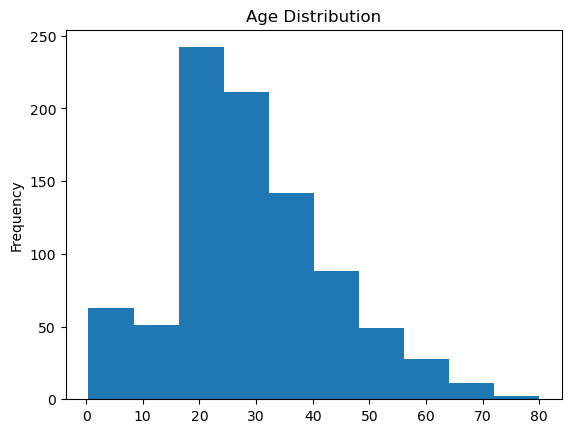

In [69]:
# Basic plotting
titanic['Age'].plot(kind='hist', title='Age Distribution')
plt.show()

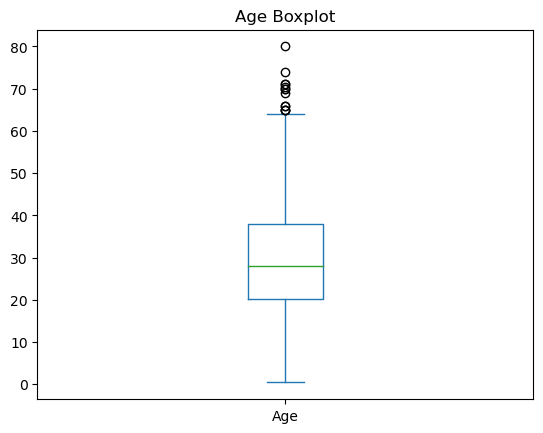

In [70]:
# Advanced plotting
titanic['Age'].plot(kind='box', title='Age Boxplot')
plt.show()

In [71]:
df2 = pd.DataFrame({0:[1,2,3,4,5,6,7,8,9],1:[1,2,3,4,5,6,7,8,9]})

In [37]:
df2

,0,1
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5
5,6,6
6,7,7
7,8,8
8,9,9


In [48]:
df2.agg(['average'],0)

,0,1
average,5.0,5.0
